In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
result_foldername= "/content/drive/My Drive/IS/multi_nli/multi_nli_result/"

**Useful functions**

In [9]:
def result_graph(dataframe, conditions, variable_condition, variable_domain):#conditions is a diction with combinations like {"model":"text_davinci_texct"},variable_domain is a list of choice for variable
  for condition in conditions:
    dataframe=dataframe.loc[dataframe[condition] == conditions[condition]]
  data={}
  head=[]
  print(len(dataframe))
  for var in variable_domain:
    var_result=dataframe.loc[dataframe[variable_condition] == var]
    print(len(var_result))
    accuracy=round(var_result["accuracy"].mean(),2)
    wrong_rate=round(1-var_result["accuracy"].mean()-var_result["unknown_rate"].mean(),2)
    try:
      correct_ratio=round(accuracy/(accuracy+wrong_rate),2)
    except:
      correct_ratio=0
    unknown_rate=round(var_result["unknown_rate"].mean(),2)
    data[var]=(accuracy, wrong_rate, correct_ratio, unknown_rate)

  results_type = ("accuracy", "wrong answer rate", "correct_ratio", "unknown_rate")

  x = np.arange(len(results_type))  # the label locations
  width = 0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in data.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Percentage')
  title="results by "+variable_condition
  for condition in conditions:
      title=title+", "+condition+":"+str(conditions[condition])
  ax.set_title(title)
  ax.set_xticks(x + width, results_type)
  ax.legend(loc='upper right', ncols=1)
  ax.set_ylim(0, 1)

  plt.show()

In [10]:
conditions_dict={
    "fewshot_format":["template1","template2","template3"],
    "model":["gpt-4-0314", "gpt-3.5-turbo",  "text-davinci-003", "text-curie-001"],
    "num_example":[1,3, 5, 10],
    "fewshot_label": ["true_label", "space", "random_target"],    
}

#Baseline process and analysis

change all nan for "instruction" to none so it's easier to locate

In [15]:
base_path=result_foldername+"Copy of multi_nli_zeroshot_result.csv"
base_snli_result=pd.read_csv(base_path)

12
4
4
4


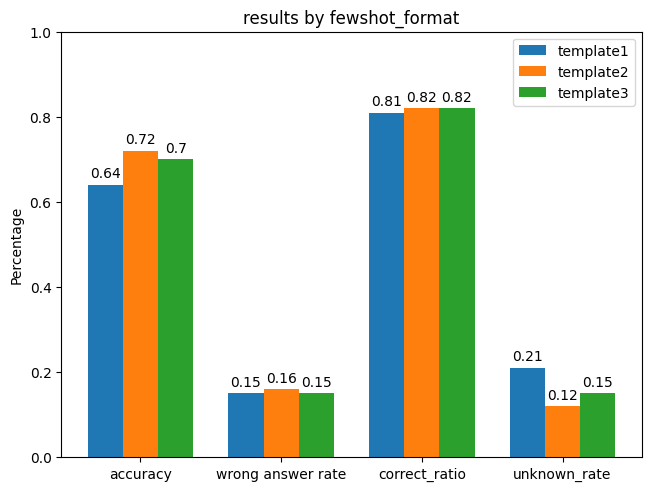

In [16]:
result_graph(dataframe=base_snli_result, conditions={}, variable_condition= "fewshot_format", variable_domain=["template1","template2","template3"])

12
3
3
3
3


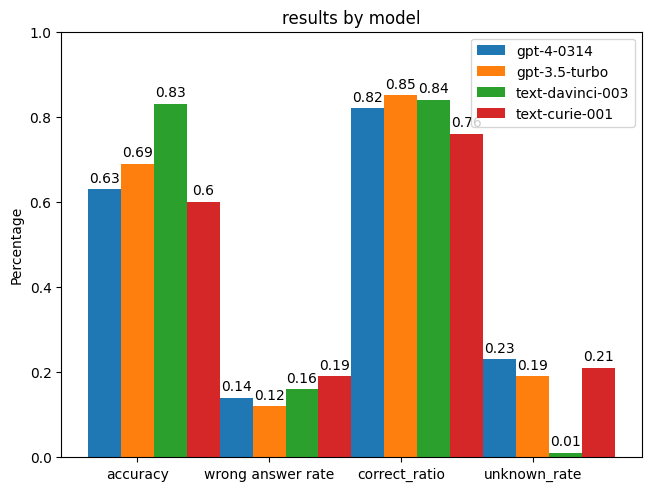

In [17]:
result_graph(dataframe=base_snli_result, conditions={}, variable_condition= "model", variable_domain=["gpt-4-0314", "gpt-3.5-turbo",  "text-davinci-003", "text-curie-001"])

#Process csv file

change all nan for "instruction" to none so it's easier to locate

In [18]:
final_path=result_foldername+"Copy of multi_nli_result.csv"
snli_result=pd.read_csv(final_path)

In [19]:
snli_result

,Unnamed: 0,index,digit,num_example,input_template,fewshot_label,model,special_case,accuracy,correct_ratio,unknown_rate,wrong_rate,f1,fewshot_format
0,NaN,0,0,1,NaN,true_label,gpt-4-0314,NaN,0.42,0.87,0.52,0.06,0.55,template1
1,NaN,1,1,1,NaN,space,gpt-4-0314,NaN,0.17,0.63,0.73,0.10,0.26,template1
2,NaN,2,2,1,NaN,random_target,gpt-4-0314,NaN,0.48,0.86,0.44,0.08,0.61,template1
3,NaN,3,10,3,NaN,true_label,gpt-4-0314,NaN,0.80,0.88,0.09,0.11,0.84,template1
4,NaN,4,11,3,NaN,space,gpt-4-0314,NaN,0.21,0.62,0.66,0.13,0.29,template1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,139,2321,5,NaN,space,text-curie-001,NaN,0.03,1.00,0.97,0.00,0.06,template3
140,NaN,140,2322,5,NaN,random_target,text-curie-001,NaN,0.56,0.57,0.01,0.43,0.57,template3
141,NaN,141,2330,10,NaN,true_label,text-curie-001,NaN,0.65,0.65,0.00,0.35,0.66,template3
142,NaN,142,2331,10,NaN,space,text-curie-001,NaN,0.00,0.00,0.98,0.02,0.00,template3


# Analysis

**num_example,fewshot_label overall**

144
36
36
36
36


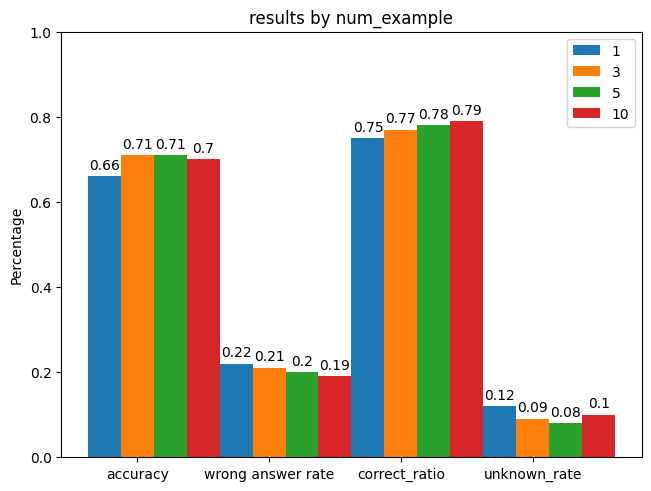

In [22]:
result_graph(dataframe=snli_result, conditions={}, variable_condition= "num_example", variable_domain=[1,3,5,10])

144
48
48
48


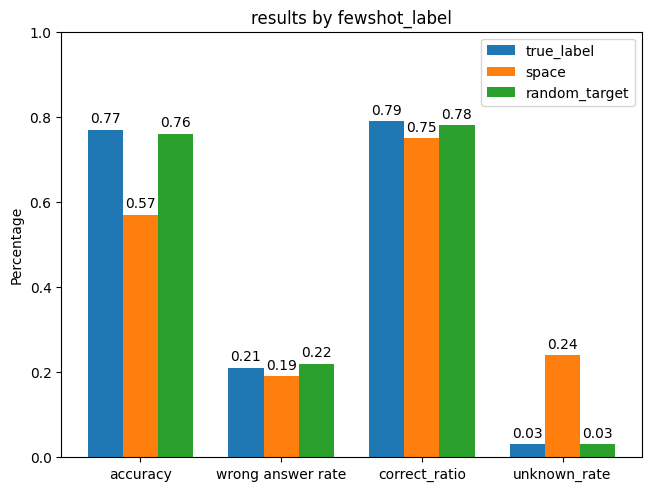

In [24]:
result_graph(dataframe=snli_result, conditions={}, variable_condition= "fewshot_label", variable_domain=["true_label", "space", "random_target"])

**num example's effect fixing label type**

48
12
12
12
12


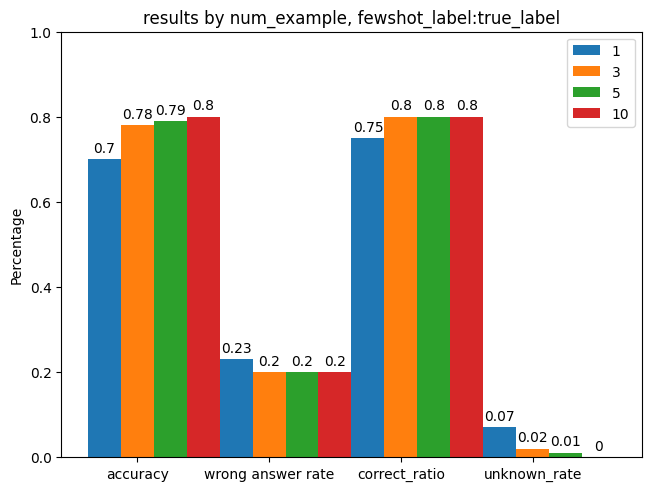

48
12
12
12
12


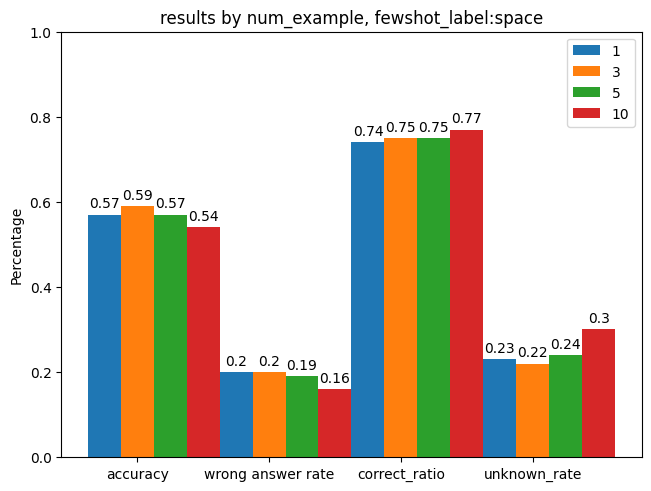

48
12
12
12
12


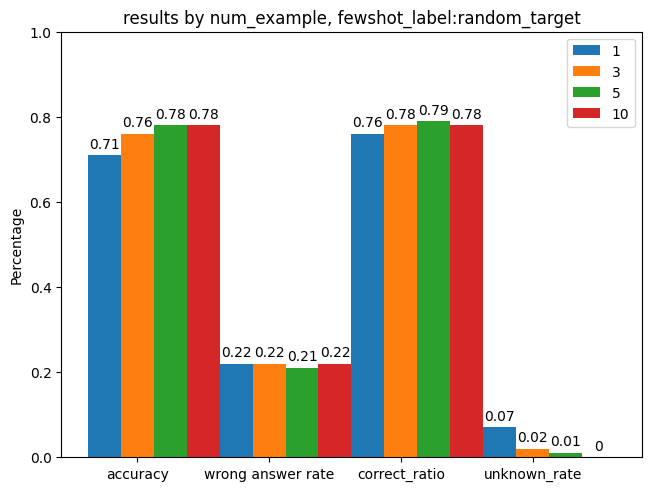

In [25]:
result_graph(dataframe=snli_result, conditions={"fewshot_label":"true_label"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"fewshot_label":"space"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"fewshot_label":"random_target"}, variable_condition= "num_example", variable_domain=[1,3,5,10])

**gpt-4-0314**

12
3
3
3
3


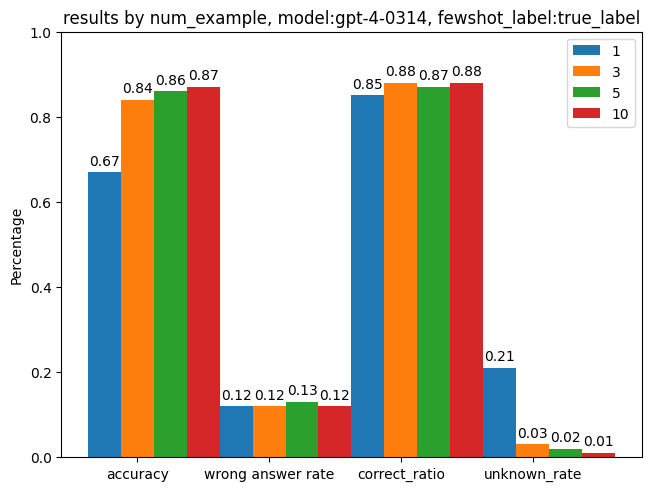

12
3
3
3
3


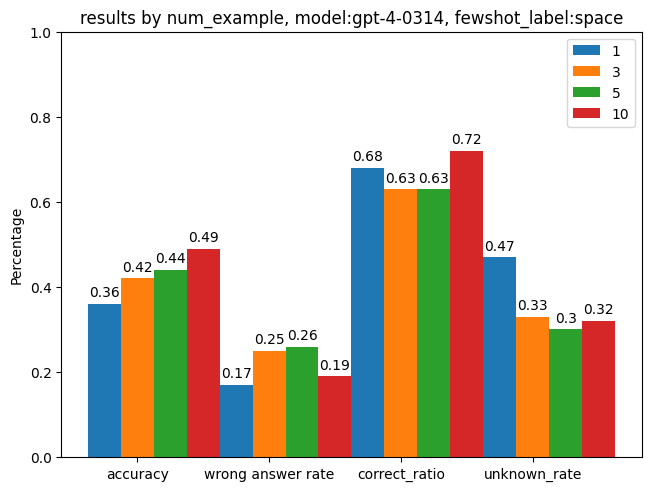

12
3
3
3
3


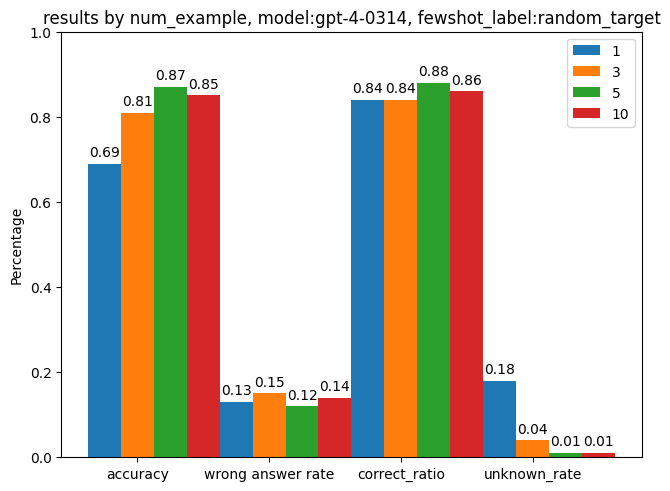

In [26]:
result_graph(dataframe=snli_result, conditions={"model":"gpt-4-0314", "fewshot_label":"true_label"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model":"gpt-4-0314","fewshot_label":"space"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model":"gpt-4-0314","fewshot_label":"random_target"}, variable_condition= "num_example", variable_domain=[1,3,5,10])

**chat-gpt**

12
3
3
3
3


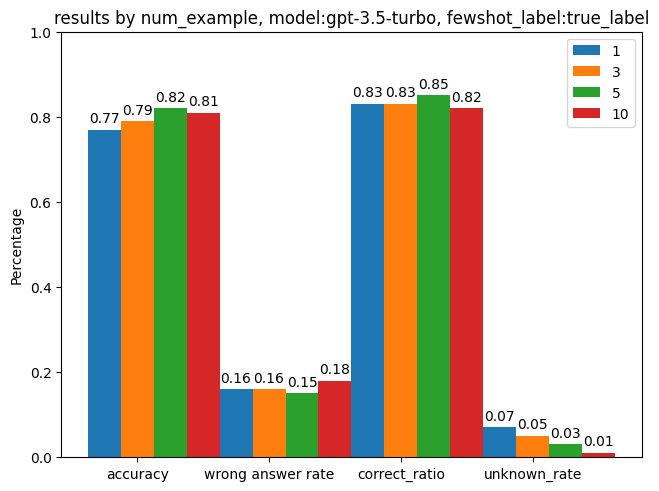

12
3
3
3
3


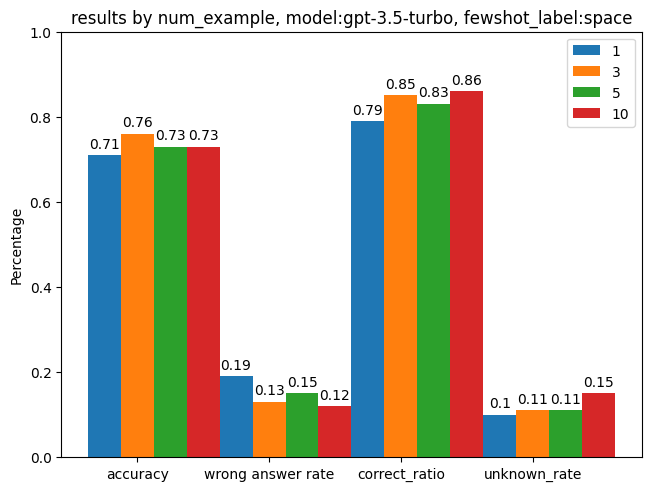

12
3
3
3
3


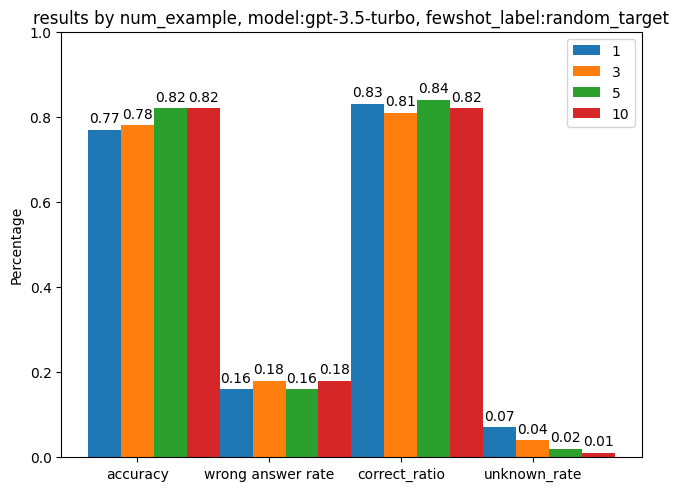

In [27]:
result_graph(dataframe=snli_result, conditions={"model":"gpt-3.5-turbo", "fewshot_label":"true_label"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model":"gpt-3.5-turbo","fewshot_label":"space"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model":"gpt-3.5-turbo","fewshot_label":"random_target"}, variable_condition= "num_example", variable_domain=[1,3,5,10])

**davinci**

12
3
3
3
3


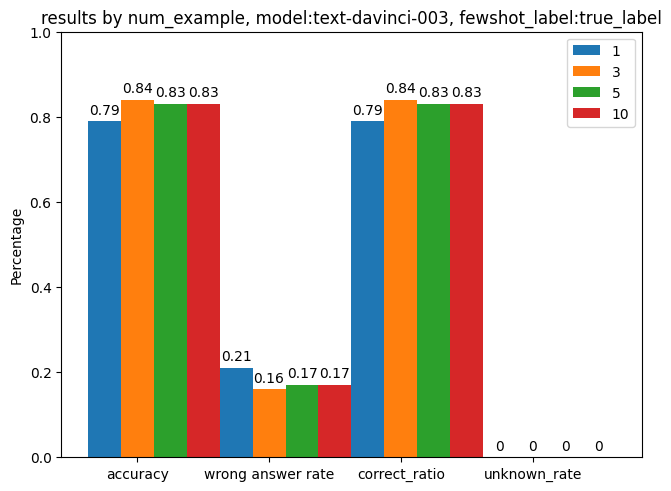

12
3
3
3
3


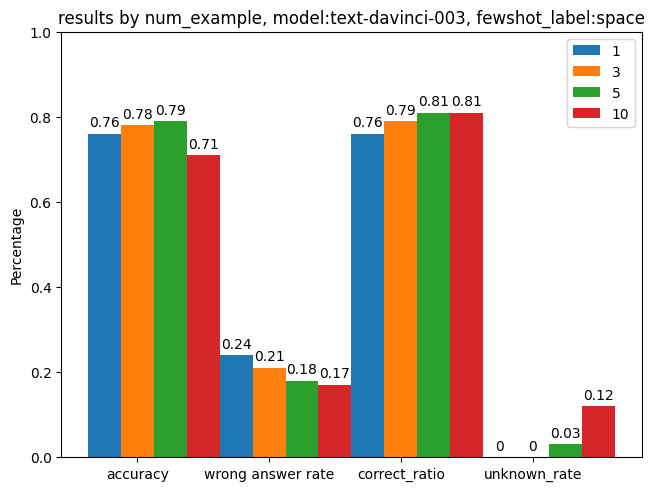

12
3
3
3
3


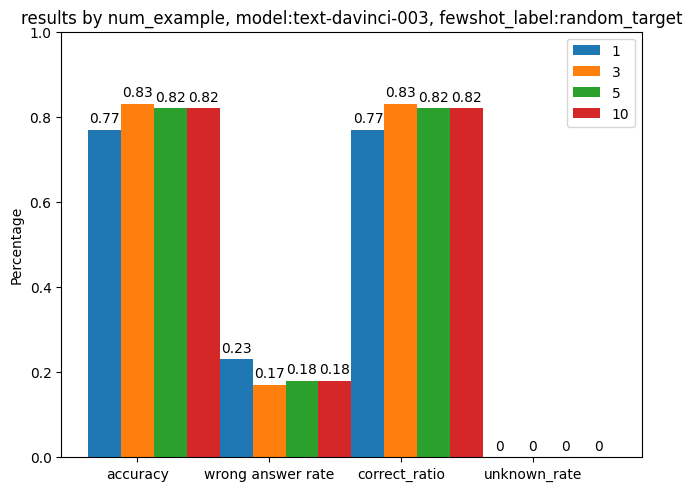

In [28]:
result_graph(dataframe=snli_result, conditions={"model": "text-davinci-003", "fewshot_label":"true_label"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model": "text-davinci-003","fewshot_label":"space"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model": "text-davinci-003","fewshot_label":"random_target"}, variable_condition= "num_example", variable_domain=[1,3,5,10])

**curie**

12
3
3
3
3


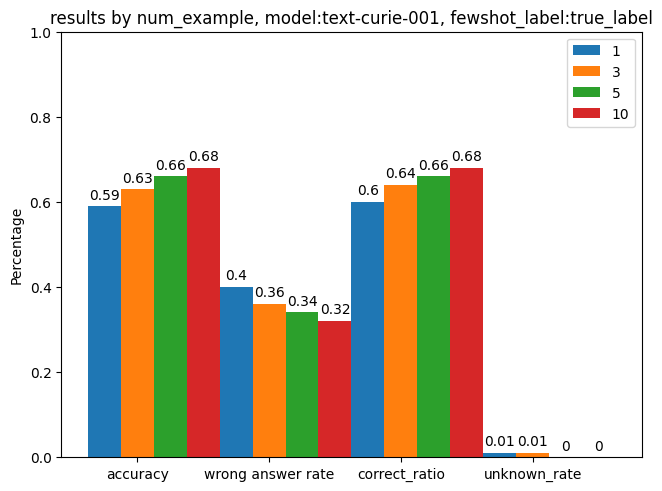

12
3
3
3
3


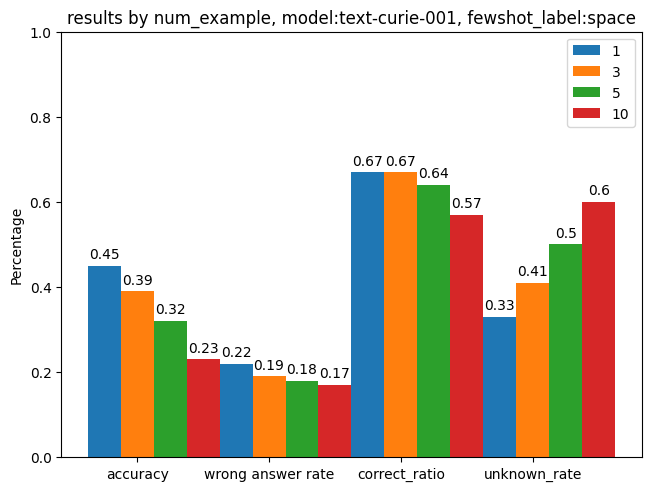

12
3
3
3
3


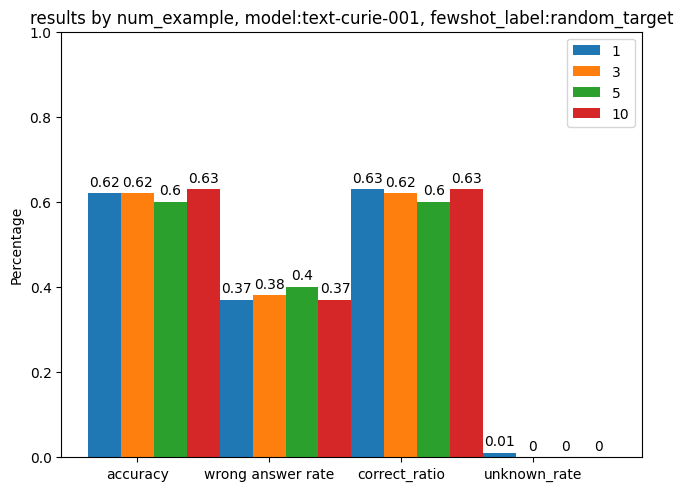

In [30]:
result_graph(dataframe=snli_result, conditions={"model":"text-curie-001", "fewshot_label":"true_label"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model":"text-curie-001","fewshot_label":"space"}, variable_condition= "num_example", variable_domain=[1,3,5,10])
result_graph(dataframe=snli_result, conditions={"model":"text-curie-001","fewshot_label":"random_target"}, variable_condition= "num_example", variable_domain=[1,3,5,10])